# Extract annotation information from RBC-GEM
## Setup
### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from rbc_gem_utils import (
    COBRA_CONFIGURATION,
    ROOT_PATH,
    DATABASE_PATH,
    ANNOTATION_PATH,
    MODEL_PATH,
    INTERIM_PATH,
    read_rbc_model,
    show_versions,
    get_annotation_df,
    compare_tables,
    visualize_comparison,
)

# Display versions of last time notebook ran and worked
show_versions()


Package Information
-------------------
rbc-gem-utils 0.0.1

Dependency Information
----------------------
cobra      0.29.0
depinfo     2.2.0
matplotlib  3.8.2
memote     0.16.1
notebook    7.0.6
requests   2.31.0
scipy      1.11.4
seaborn    0.13.0

Build Tools Information
-----------------------
pip        23.3.1
setuptools 68.2.2
wheel      0.41.2

Platform Information
--------------------
Darwin  22.6.0-x86_64
CPython        3.12.0


### Define configuration
#### COBRA Configuration

In [2]:
COBRA_CONFIGURATION

Attribute,Description,Value
solver,Mathematical optimization solver,gurobi
tolerance,"General solver tolerance (feasibility, integrality, etc.)",1e-07
lower_bound,Default reaction lower bound,-1000.0
upper_bound,Default reaction upper bound,1000.0
processes,Number of parallel processes,15
cache_directory,Path for the model cache,/Users/zhaiman/Library/Caches/cobrapy
max_cache_size,Maximum cache size in bytes,104857600
cache_expiration,Model cache expiration time in seconds (if any),None


## Load RBC-GEM model
### Current Version: 0.3.0

In [3]:
model = read_rbc_model(filetype="xml")
model.reactions.sort()
model.genes.sort()
model.metabolites.sort()
model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-28


Name,RBC_GEM
Memory address,14b406810
Number of metabolites,292
Number of reactions,348
Number of genes,283
Number of groups,33
Objective expression,1.0*NaKt - 1.0*NaKt_reverse_db47e
Compartments,"cytosol, extracellular space"


## Extract annotations from model

In [4]:
compare = True
overwrite = True

### Reactions

,reactions,bigg.reaction,biocyc,ec-code,kegg.reaction,metanetx.reaction,metatlas,reactome,rhea,sabiork.reaction,sbo,seed.reaction,spontaneous,tcdb,vmhreaction
0,3MOXTYRESSte,3MOXTYRESSte,NaN,NaN,NaN,MNXR94930,MAR11306,NaN,NaN,NaN,SBO:0000185,NaN,0,NaN,3MOXTYRESSte
1,4PYRDXABCte,4PYRDX,NaN,NaN,NaN,MNXR95053,MAR08103,NaN,NaN,NaN,SBO:0000185,NaN,0,NaN,4PYRDX
2,5AOPt2,5AOPt2,NaN,NaN,NaN,MNXR95061,MAR11307,NaN,NaN,NaN,SBO:0000185,rxn09702,0,NaN,5AOPt2
3,ACALDt,ACALDt,NaN,NaN,NaN,MNXR95212,MAR04948,R-HSA-449872,NaN,NaN,SBO:0000185,rxn09700;rxn08033;rxn13212;rxn08032,0,NaN,ACALDt
4,ACGAM2E,ACGAM2E,META:RXN-16006,5.1.3.8,R01207,MNXR95247,MAR04527,NaN,NaN,1441,SBO:0000176,rxn00897,0,NaN,ACGAM2E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,UREAt,UREAt,META:TRANS-RXN0-460,NaN,NaN,MNXR105156,MAR04949,R-HSA-507875;R-HSA-507873;R-HSA-444126,32799,NaN,SBO:0000185,rxn09369;rxn05667;rxn09368,0,1.A.28.1.3,UREAt
344,URIt,URIt,NaN,NaN,NaN,MNXR105165,MAR05035,NaN,NaN,NaN,SBO:0000185,rxn10987;rxn09372,0,2.A.57.1.4,URIt
345,XYLK,XYLK,META:XYLULOKIN-RXN,2.7.1.17,R01639,MNXR105255,MAR04595,R-HSA-5662466,10964,NaN,SBO:0000176,rxn01199,0,NaN,XYLK
346,XYLTD_Dx,XYLTD_D,META:D-XYLULOSE-REDUCTASE-RXN,1.1.1.14;1.1.1.9,R01896,MNXR105262,MAR04593,R-HSA-5662471,20433,1954,SBO:0000176,rxn01385,0,NaN,XYLTD_Dr;r0784


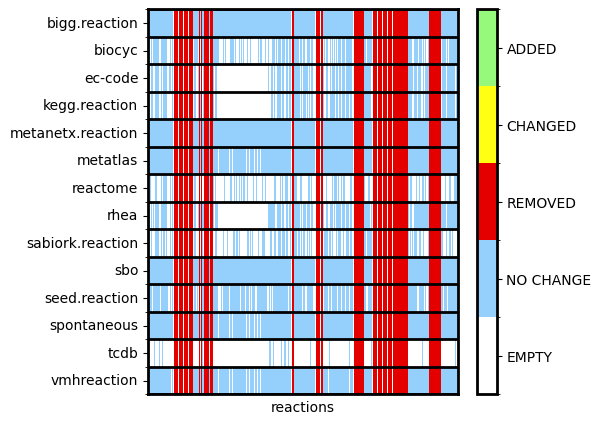

In [5]:
annotation_type = "reactions"
all_annotation_keys = set()
for annotation in getattr(model, annotation_type).list_attr("annotation"):
    all_annotation_keys.update(list(annotation.keys()))
# Get annotation df is agnostic to object type, swap ID column with the `annotation_type`
df_annotations = get_annotation_df(
    getattr(model, annotation_type), 
    sorted(list(all_annotation_keys))
).rename({"id": annotation_type}, axis=1)

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
            sep="\t", 
            index_col=0,
            dtype=str,
        )
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=[annotation_type], dtype=str)
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_annotations.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_annotations.to_csv(f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv",sep="\t")
else:
    df_annotations.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t")
df_annotations

### Metabolites

,metabolites,bigg.metabolite,biocyc,chebi,envipath,hmdb,inchikey,kegg.compound,kegg.drug,kegg.glycan,lipidmaps,metanetx.chemical,metatlas,pubchem.compound,reactome,sabiork.compound,sbo,seed.compound,slm,vmhmetabolite
0,13dpg_c,13dpg,META:DPG,CHEBI:16001,NaN,HMDB62758,LJQLQCAXBUHEAZ-UWTATZPHSA-J,C00236,NaN,NaN,NaN,MNXM261,MAM00247c,439191,29800,21215,SBO:0000247,cpd00203,NaN,13dpg
1,23dpg_c,23dpg,META:23-DIPHOSPHOGLYCERATE,CHEBI:17720,NaN,HMDB01294,XOHUEYCVLUUEJJ-UWTATZPHSA-I,C01159,NaN,NaN,NaN,MNXM146487;MNXM892,MAM00569c,NaN,6798337,20899;1355,SBO:0000247,cpd00853;cpd02119,NaN,23dpg
2,2kmb_c,2kmb,META:CPD-479,CHEBI:33574,NaN,HMDB01553;HMDB13210,SXFSQZDSUWACKX-UHFFFAOYSA-M,C01180,NaN,NaN,LMFA01060170,MNXM276,MAM01016c,NaN,1237122,5424,SBO:0000247,cpd00869,NaN,2kmb
3,2pg_c,2pg,META:2-PG,CHEBI:17835,NaN,HMDB00362;HMDB62707;HMDB03391,GXIURPTVHJPJLF-UWTATZPHSA-K,C00631,NaN,NaN,NaN,MNXM275,MAM00674c,439278,30485,31,SBO:0000247,cpd00482,NaN,2pg
4,35camp_c,camp,META:CAMP,CHEBI:17489,NaN,HMDB0000058,IVOMOUWHDPKRLL-KQYNXXCUSA-M,C00575,NaN,NaN,NaN,MNXM243,MAM01419c,6076,30389,1379,SBO:0000247,cpd00446,NaN,camp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,xmp_c,xmp,META:XANTHOSINE-5-PHOSPHATE,CHEBI:15652,NaN,HMDB01554;HMDB62755,DCTLYFZHFGENCW-UUOKFMHZSA-L,C00655,NaN,NaN,NaN,MNXM298,MAM03150c,73323,111584,1686,SBO:0000247,cpd00497,NaN,xmp
288,xu5p__D_c,xu5p__D,META:XYLULOSE-5-PHOSPHATE,CHEBI:16332,NaN,HMDB06212;HMDB00868,FNZLKVNUWIIPSJ-RFZPGFLSSA-L,C00231,NaN,NaN,NaN,MNXM186,MAM01761c,439190,29790,1317,SBO:0000247,cpd00198,NaN,xu5p_D
289,xylt_c,xylt,META:XYLITOL,CHEBI:1305691,NaN,HMDB0002917,HEBKCHPVOIAQTA-SCDXWVJYSA-N,C00379,D00061,NaN,NaN,MNXM510,MAM03155c,6912,5660033,2033,SBO:0000247,cpd00306,NaN,xylt
290,xylu__D_c,xylu__D,META:D-XYLULOSE,CHEBI:17140,NaN,HMDB0001644,ZAQJHHRNXZUBTE-WUJLRWPWSA-N,C00310,NaN,NaN,NaN,MNXM597,MAM01759c,5289590,5661281,1504,SBO:0000247,cpd00259,NaN,xylu_D


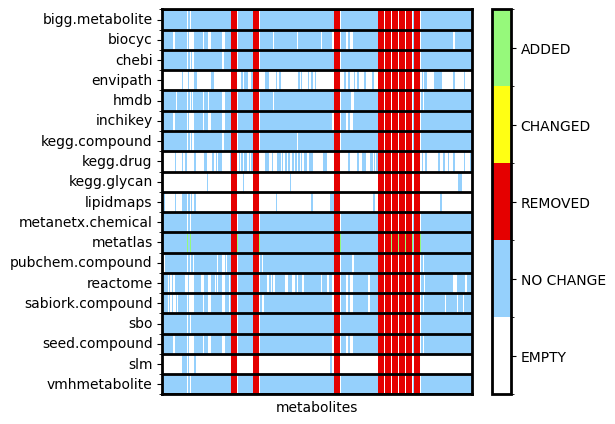

In [6]:
annotation_type = "metabolites"
all_annotation_keys = set()
for annotation in getattr(model, annotation_type).list_attr("annotation"):
    all_annotation_keys.update(list(annotation.keys()))
# Get annotation df is agnostic to object type, swap ID column with the `annotation_type`
df_annotations = get_annotation_df(
    getattr(model, annotation_type), 
    sorted(list(all_annotation_keys))
).rename({"id": annotation_type}, axis=1)

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
            sep="\t", 
            index_col=0,
            dtype=str,
        )
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=[annotation_type], dtype=str)
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_annotations.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_annotations.to_csv(f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv",sep="\t")
else:
    df_annotations.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t")
df_annotations

### Genes

,genes,ccds,drugbank,ensembl,hgnc.symbol,hprd,mgi,mim,ncbigene,ncbigi,refseq,sbo,uniprot,uniprot.isoform
0,ABCC4,CCDS9474.1,DB00718;DB00770;DB01076;DB00171;DB01327;DB0048...,ENSG00000125257,ABCC4,NaN,MGI:2443111,605250,10257,NaN,NP_005836.2,SBO:0000243,O15439,O15439-1
1,ABCG2,CCDS3628.1,DB12001;DB08916;DB11363;DB00437;DB12015;DB0349...,ENSG00000118777,ABCG2,NaN,MGI:1347061;MGI:1351624,138900;603756;614490,9429,NaN,NP_004818.2;XP_011530722.1,SBO:0000243,Q9UNQ0,Q9UNQ0-1
2,ACP1,CCDS1639.1,DB04214;DB00173,NaN,ACP1,NaN,MGI:87881,171500,52,NaN,NP_004291.1,SBO:0000243,P24666,P24666-1
3,ACSL1,CCDS3839.1,DB00131;DB00171,ENSG00000151726,ACSL1,NaN,MGI:102797,152425,2180,NaN,NP_001273637.1;NP_001986.2;XP_016863376.1,SBO:0000243,P33121,P33121-1
4,ADA,CCDS13335.1,DB07711;DB07783;DB07786;DB04218;DB07785;DB0301...,ENSG00000196839,ADA,NaN,MGI:87916,102700;608958,100,NaN,NP_000013.2,SBO:0000243,P00813,P00813-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,UMPS,CCDS3029.1,DB02890;DB00544,ENSG00000114491,UMPS,02022,MGI:1298388,258900;613891,7372,NaN,NP_000364.1,SBO:0000243,P11172,P11172-1
279,UROD,CCDS518.1,DB03727;DB04461,ENSG00000126088,UROD,NaN,MGI:98916,176100;613521,7389,NaN,NP_000365.3,SBO:0000243,P06132,P06132-1
280,UROS,CCDS7648.1,NaN,ENSG00000188690,UROS,NaN,MGI:98917,263700;606938,7390,NaN,NP_000366.1,SBO:0000243,P10746,P10746-1
281,XYLB,CCDS2678.1,NaN,ENSG00000093217,XYLB,06812,MGI:2142985,604049,9942,NaN,NP_005099.2,SBO:0000243,O75191,O75191-1


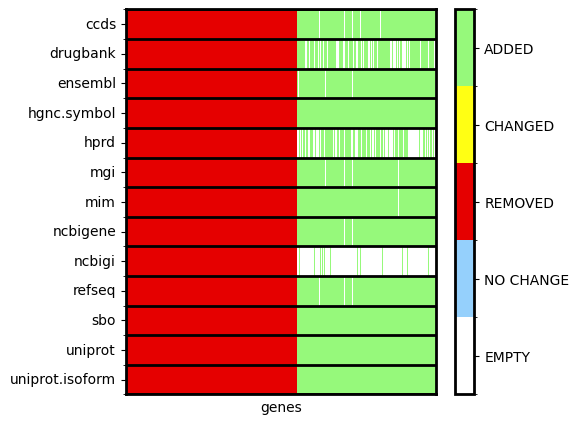

In [7]:
annotation_type = "genes"
all_annotation_keys = set()
for annotation in getattr(model, annotation_type).list_attr("annotation"):
    all_annotation_keys.update(list(annotation.keys()))
# Get annotation df is agnostic to object type, swap ID column with the `annotation_type`
df_annotations = get_annotation_df(
    getattr(model, annotation_type), 
    sorted(list(all_annotation_keys))
).rename({"id": annotation_type}, axis=1)

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
            sep="\t", 
            index_col=0,
            dtype=str,
        )
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=[annotation_type], dtype=str)
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_annotations.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_annotations.to_csv(f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv",sep="\t")
else:
    df_annotations.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t")
df_annotations